# Pytorch Model

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(1)

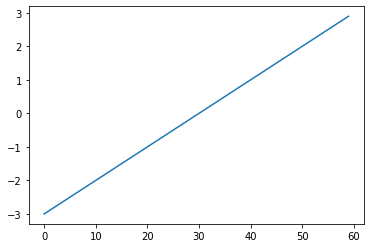

In [72]:
# create sim data
X = torch.arange(-3,3, 0.1).view(-1,1)
plt.plot(X.numpy())


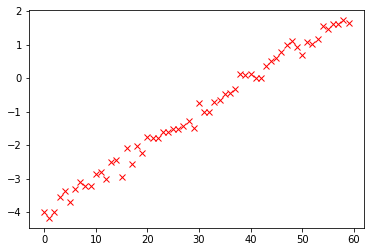

In [74]:

f = 1 * X - 1
Y = f + 0.2 * torch.randn(X.size())
plt.plot(Y.numpy(), 'rx')

### Create the model

In [75]:
# forward
def forward(x):
    return w * x + b

# MSE
def criterion(yhat, y):
     return torch.mean((yhat - y) ** 2)
    
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

# learning rate
lr = 0.01
# loss list
LOSS = []

def train(iter):
    
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss
        loss = criterion(Yhat, Y)
        
        LOSS.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        print(w.data)
        
        w.grad.data.zero_()
        b.grad.data.zero_()


In [76]:
train_model(5)


tensor(-14.0486)
tensor(-13.1541)
tensor(-12.3131)
tensor(-11.5225)
tensor(-10.7792)


# Dataset

In [59]:
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3,3,0.1).view(-1,1)
        self.y = 1 * X - 1
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len
    

    
# Create Data object & Data Loader object
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size=5)


                                    

## Mini Batch

In [64]:
LOSS_MINI = []

def train_mini(epochs):
    
    for epoch in range(epochs):
        Yhat = forward(X)
        LOSS_MINI.append(criterion(forward(X), Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
            

In [65]:
# 5 batches
train_mini(5)
print(LOSS_MINI)

[0.008338120765984058, 0.008338120765984058, 0.008338120765984058, 0.008338120765984058, 0.008338120765984058]
